# Outline:
## 1.先来回顾上节课内容（全连接神经网络）
## 2.为什么要用卷积
## 3.卷积是怎么卷的
## 4.典型的卷积网络长什么样
## 5.从头build一个CNN来进行一个简单的分类任务
## 6.给大家看看卷积卷出来的到底是什么
## 7.进一步提升：借助预训练的模型进行预测


# 1 全连接神经网络


*   Input (shape?)
*   Hidden Layer
*   Activation
*   Output
*   Loss function
*   Model loss
*   Backpropagation
*   SGD
*   When to stop?


In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(784,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'crossentropy',
              metrics = ['acc'])

# 2 为什么要用卷积

# 3 卷积是怎么实现的  


---


从最简单的例子开始
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551078820438-5ffec5ec-c32e-40db-afbb-00fe98daca0c.gif)
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551078963956-2b10263c-3be8-49e1-a2a5-c3f78dbda32c.gif)  


---


然后引入了padding的概念，也就是往边缘填充

![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551079167251-cfad5f66-158f-4a19-b4e7-4c851289df7e.gif)



---

再加入步幅(stride)  
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551079167251-3fecfd2c-275e-4db9-82e4-c196a8277b47.gif)


---

大多数时候，我们处理的图像是三通道的。所以，多通道版本  ：  
![alt text](https://cdn.nlark.com/yuque/0/2019/jpeg/160603/1551084127859-6910b20d-f5b0-45ec-9f87-b23c080472e3.jpeg)  

对于这种问题，我们的卷积核也是又多个通道的：  
![alt text](https://cdn.nlark.com/yuque/0/2019/png/160603/1551084127737-da485393-3832-482c-991d-ede09a5a92fc.png)  

两种方式帮助大家理解多通道卷积是怎么计算的：  
1.逐层划过  
2.所有channels 同时划过  
############   
逐层划过  
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551084128079-20f991f4-c2f8-4bba-b2d8-35dcd08918c2.gif)  
![alt text](https://cdn.nlark.com/yuque/0/2019/gif/160603/1551084127732-999f2db5-8c99-4c7c-b806-11db1fb23b6c.gif)  

############  
所有channels 同时划过  
![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551085717619-c138a71c-07de-42c7-b5f2-a879306dac9f.png)  

但是直到这我们也只实现了一层的feature map, 想实现多层怎么办：  
![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551085717309-91a2b53f-4dae-475e-b910-e100c96d7824.png)    

最后再介绍三种卷积：  
1X1卷积  
![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551085717557-3677cf4e-1a23-4770-997a-37c1bb8dc156.png)    

3D卷积  
![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551085717450-a965a7f7-3ac1-4e54-acd1-2ad68f1b4b6b.png)  

深度可分离卷积：  

![](https://cdn.nlark.com/yuque/0/2019/png/160603/1551087905655-6c625bdd-f9e1-4984-b90f-8e56de40026d.png)



# 4 典型的卷积网络长什么样  
给大家看一个很早期的LeNet, 很经典的一个网络架构  

![alt text](http://img.mp.itc.cn/upload/20170416/b41478d96ef340289d24dc78bdffb0f1_th.jpeg)


In [1]:
# 现在我们来重现以下这个网络看看对不对
from keras import layers
from keras import models


model_lenet = models.Sequential()
model_lenet.add(layers.Conv2D(6,(5,5), activation='relu', input_shape = (32,32,1)))
model_lenet.add(layers.MaxPooling2D(2,2))
model_lenet.add(layers.Conv2D(16,(5,5),activation='relu'))
model_lenet.add(layers.MaxPooling2D(2,2))
model_lenet.add(layers.Flatten())
model_lenet.add(layers.Dense(120,activation='relu'))
model_lenet.add(layers.Dense(84,activation='relu'))
model_lenet.add(layers.Dense(10,activation='softmax'))

model_lenet.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dens

In [0]:
from keras.utils import plot_model
plot_model(model_lenet, show_shapes=True, to_file='model.png')

# 5 从头build一个CNN来进行一个简单的分类任务
一个超级简单的图像分类任务猫狗分类。 通过这个任务，大家可以看出怎么使用CNN来解决现实问题。


## Load the data

In [1]:
# 首先我们获取数据

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2019-02-27 05:54:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  43.9MB/s    in 1.5s    

2019-02-27 05:54:47 (43.9 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [3]:
os.listdir('sample_data/cats_and_dogs_filtered')

['validation', 'train', 'vectorize.py']

In [4]:
print('training cat images',len(os.listdir('sample_data/cats_and_dogs_filtered/train/cats')))
print('training dog images',len(os.listdir('sample_data/cats_and_dogs_filtered/train/dogs')))

print('validation cat images',len(os.listdir('sample_data/cats_and_dogs_filtered/validation/cats')))
print('validation dog images',len(os.listdir('sample_data/cats_and_dogs_filtered/validation/dogs')))

training cat images 1000
training dog images 1000
validation cat images 500
validation dog images 500


In [0]:
#这时候我们从validation folder 中分出250个创建一个test folder
import shutil

base_dir = '/content/sample_data/cats_and_dogs_filtered'

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(base_dir, 'train/cats')
train_dogs_dir = os.path.join(base_dir, 'train/dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

validation_cats_dir = os.path.join(base_dir, 'validation/cats')
validation_dogs_dir = os.path.join(base_dir, 'validation/dogs')

fnames_cats = os.listdir(validation_cats_dir)[0:250]
fnames_dogs = os.listdir(validation_dogs_dir)[0:250]

for fname_cats, fname_dogs in zip(fnames_cats, fnames_dogs):
  src_cats = os.path.join(validation_cats_dir, fname_cats)
  src_dogs = os.path.join(validation_dogs_dir, fname_dogs)
  
  dst_cats = os.path.join(test_cats_dir, fname_cats)
  dst_dogs = os.path.join(test_dogs_dir, fname_dogs)
  
  shutil.move(src_cats, dst_cats)
  shutil.move(src_dogs, dst_dogs)

In [6]:
print('training cat images:', len(os.listdir(train_cats_dir)))
print('training dog images:', len(os.listdir(train_dogs_dir)))
print('validation cat images:', len(os.listdir(validation_cats_dir)))
print('validation dog images:', len(os.listdir(validation_dogs_dir)))
print('test cat images:', len(os.listdir(test_cats_dir)))
print('test dog images:', len(os.listdir(test_dogs_dir)))

training cat images: 1000
training dog images: 1000
validation cat images: 250
validation dog images: 250
test cat images: 250
test dog images: 250


## 数据预处理
如何将.jpg数据处理成模型的input(tensor)?


1.   Read the image
2.   Decode the .jpg file to RGB format
3.   Convert RGB format to tensor
4.   Normalization the data to [0-1]

在这个案例里，我们使用keras.preprocessing.image中的ImageDataGenerator函数，创建一个生成器，来将jpg转化为tensor


In [0]:
def gnt():
  for i in range(1000):
      yield i

In [0]:
g=gnt()


In [48]:
#next 
next(g)

4

In [49]:
#for
for data in gnt():
  print(data)
  break

0


In [10]:
# 以上为生成器的介绍，下面我们构建数据预处理的生成器
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Now we can see the output of the generator
# But how can we know which class is 0/1
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  
  print('labels batch shape:', labels_batch.shape)
  print(labels_batch)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
[0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


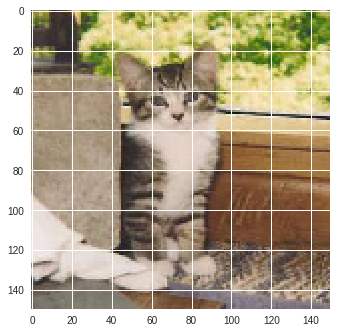

In [14]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
plt.imshow(image.array_to_img(data_batch[0]))

In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# 配置我们的模型
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['acc'])

In [15]:
# 训练模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 25)

# 随手保存模型是一个好习惯
model.save('cat_dog_small_1.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 14s 143ms/step - loss: 0.6870 - acc: 0.5400 - val_loss: 0.6607 - val_acc: 0.6440
Epoch 2/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6583 - acc: 0.6045 - val_loss: 0.6280 - val_acc: 0.6760
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6035 - acc: 0.6745 - val_loss: 0.5814 - val_acc: 0.6980
Epoch 4/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5692 - acc: 0.6980 - val_loss: 0.5778 - val_acc: 0.7020
Epoch 5/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5403 - acc: 0.7165 - val_loss: 0.5584 - val_acc: 0.7260
Epoch 6/30
100/100 [==============================] - 8s 85ms/step - loss: 0.5102 - acc: 0.7495 - val_loss: 0.5487 - val_acc: 0.7100
Epoch 7/30
100/100 [==============================] - 9s 86ms/step - loss: 0.4878 - acc: 0.7650 - val_loss: 0.5553 - val_acc: 0.7060
Epoch 8/30
100/100 

In [16]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

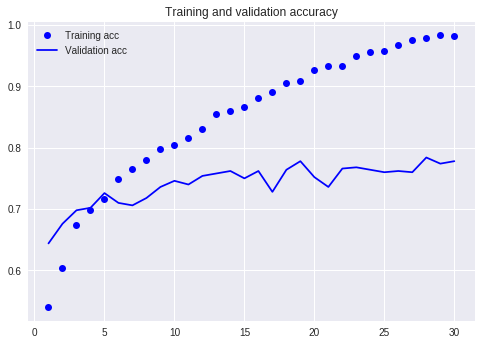

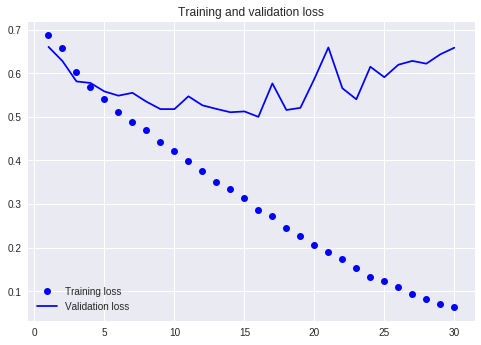

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# 这时候我们能看出来，效果不是很乐观
# 所以这时候我们要尝试改进我们的模型
# 第一个想到的是：我们要做数据扩增(data augmentation)
# 先来看一下具体可以从哪些方面扩增，以及扩增完了长什么样子

datagen = ImageDataGenerator(
      rotation_range=40,           #图像随机旋转角度范围
      width_shift_range=0.2,       #图像水平或垂直方向平移范围（比例）
      height_shift_range=0.2,      #同上
      shear_range=0.2,             #随机错切变换角度
      zoom_range=0.2,              #随机缩放的范围
      horizontal_flip=True,        #随机将一半图像水平翻转
      fill_mode='nearest')         #随机填充新建像素方法

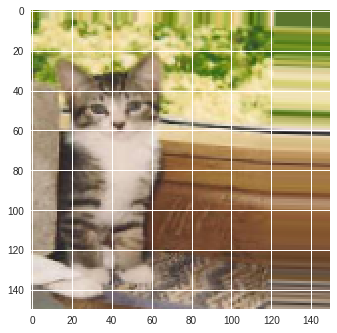

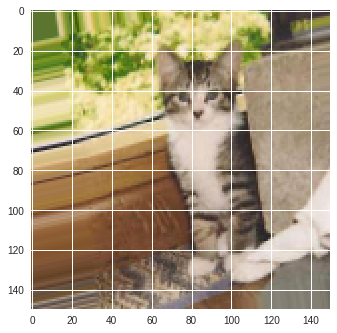

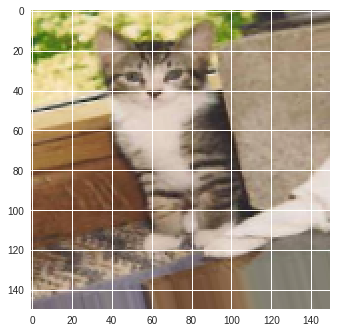

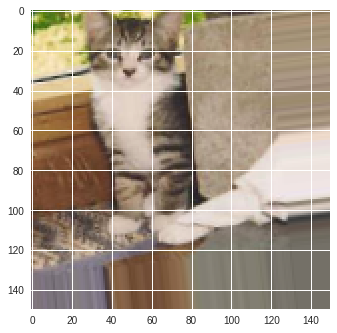

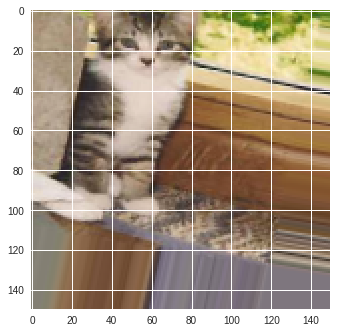

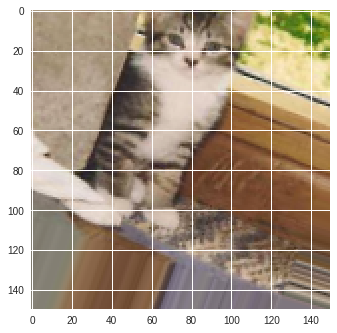

In [23]:
# 使用我们刚才展示的图片，看看augmentation后是什么样子
img_cat = data_batch[0]
i=0
for batch in datagen.flow(img_cat.reshape((1,)+img_cat.shape), batch_size=1):
  plt.figure(i)
  implot=plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i>5:
    break
plt.show()

In [24]:
# 所以说data augmentation 可以生成无数张不一样的图片的，但确实每个图片之间是高度相关的
# 我们现在拿augmentation过的数据来训练个模型看看
# 首先重新定义我们的generator
# 需要注意的一点是我们的validation和test data 是不需要augmentation的

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

#! don't augment test set
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size=20,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6940 - acc: 0.5115 - val_loss: 0.6845 - val_acc: 0.5780
Epoch 2/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6844 - acc: 0.5460 - val_loss: 0.6716 - val_acc: 0.5340
Epoch 3/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6711 - acc: 0.5830 - val_loss: 0.6503 - val_acc: 0.5900
Epoch 4/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6624 - acc: 0.5860 - val_loss: 0.6230 - val_acc: 0.6900
Epoch 5/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6434 - acc: 0.6215 - val_loss: 0.6267 - val_acc: 0.6280
Epoch 6/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6325 - acc: 0.6455 - val_loss: 0.6253 - val_acc: 0.6420
Epoch 7/100
100/100 [==============================] - 20s 195ms/step - loss: 0.6168 - acc: 0.6645 - val_loss: 0.6186 - val_acc: 0.6520
Epoch 8/100
100/100 [===========================

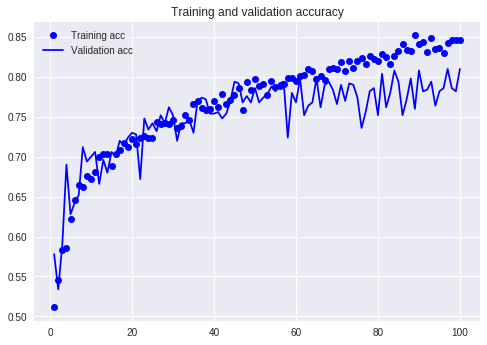

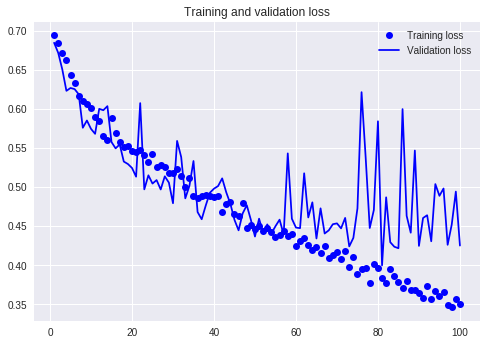

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# model add dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6942 - acc: 0.5070 - val_loss: 0.6829 - val_acc: 0.5780
Epoch 2/100
100/100 [==============================] - 18s 185ms/step - loss: 0.6771 - acc: 0.5655 - val_loss: 0.6667 - val_acc: 0.5710
Epoch 3/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6740 - acc: 0.5820 - val_loss: 0.6931 - val_acc: 0.5090
Epoch 4/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6664 - acc: 0.5995 - val_loss: 0.6264 - val_acc: 0.6760
Epoch 5/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6492 - acc: 0.6295 - val_loss: 0.6217 - val_acc: 0.6490
Epoch 6/100
100/100 [==============================] - 18s 182ms/step - loss: 0.6247 - acc: 0.6430 - val_loss: 0.5949 - val_acc: 0.6820
Epoch 7/100
100/100 [==============================] - 18s 178ms/step - loss: 0.6141 - acc: 0.6625 - val_loss: 0.5679 - val_acc: 0.6890
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cat_dog_small_2.h5')

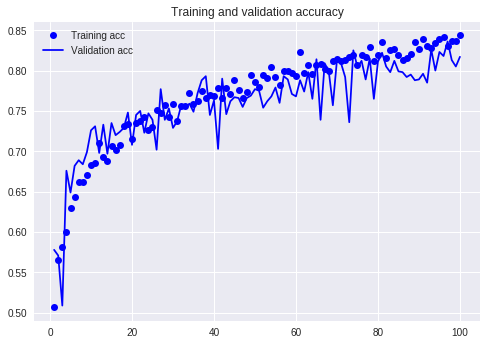

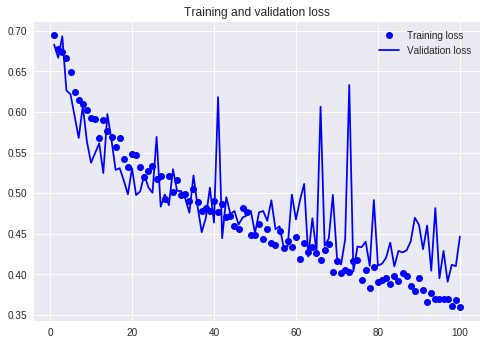

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test acc:', test_acc)

Found 500 images belonging to 2 classes.
test acc: 0.8300000023841858


# 6 现在给大家看看卷积处理后得出的到底是什么

In [40]:
# 首先我们load 我们保存的最后一个模型
from keras.models import load_model
model = load_model('cat_dog_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [41]:
# 这时候我们去网上找一张猫的图片，传上来，并进行处理
# 给他起名叫cat_google.jpg
from keras.preprocessing import image
import numpy as np
img = image.load_img('cat_google.jpg', target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


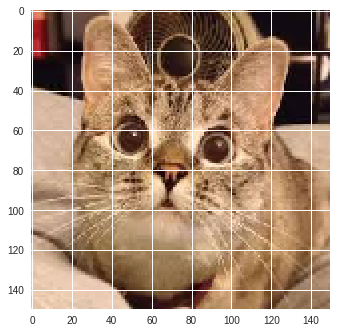

In [42]:
plt.imshow(img_tensor[0])
plt.show()

In [0]:
# 为了实现这个，我们需要创建一个Keras 模型，以图像批量作为输入，并输出所有卷积层和池化层的激活
from keras import models

#提取model前8层输出
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [46]:
# 得到的这个模型就厉害了，它可是一个输入八层输出的模型
activations = activation_model.predict(img_tensor)

# 返回8 个Numpy数组组成的列表，每个层激活对应一个Numpy 数组
print(len(activations))

8


In [47]:
# 从第一个开始看
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


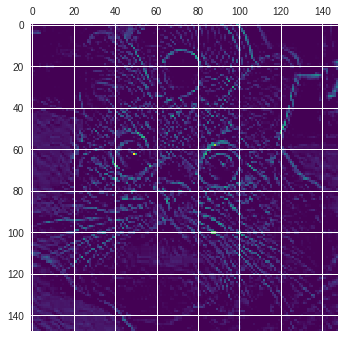

In [48]:
# 第一个layers有32个通道，我们先来看第一个通道
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

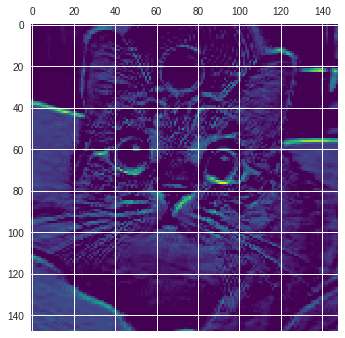

In [49]:
# 再看看第五个
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

In [44]:
model.predict_classes(img_tensor)

array([[1]], dtype=int32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


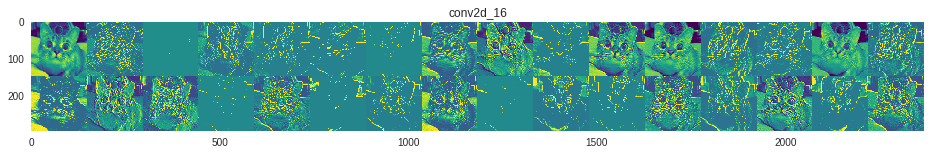

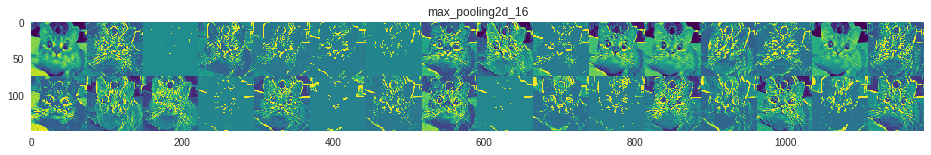

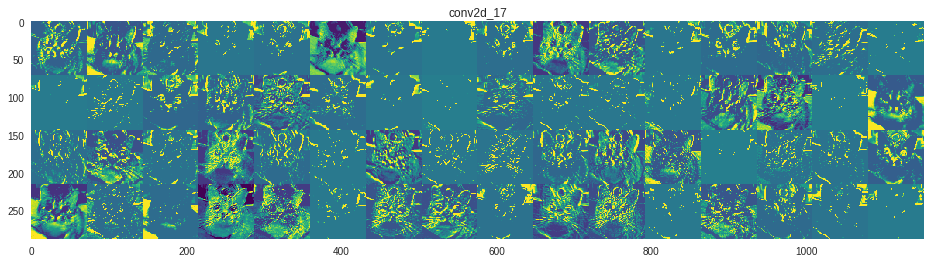

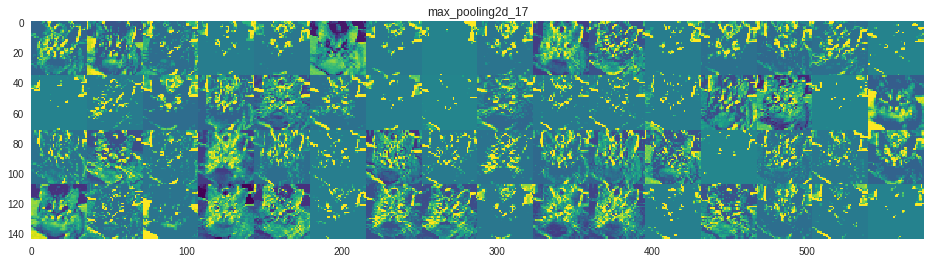

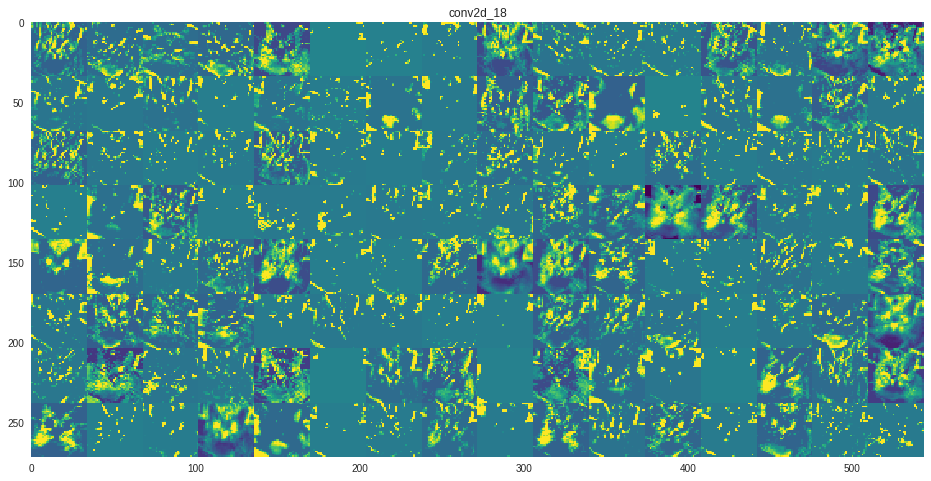

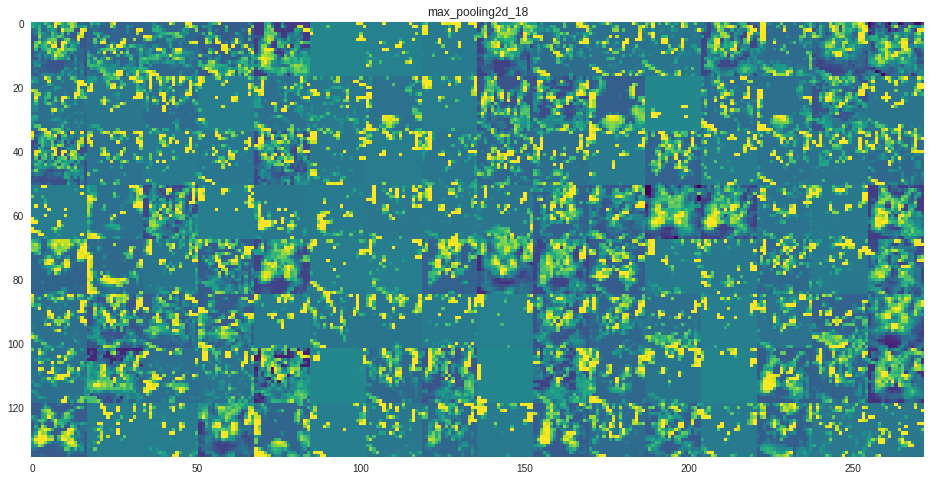

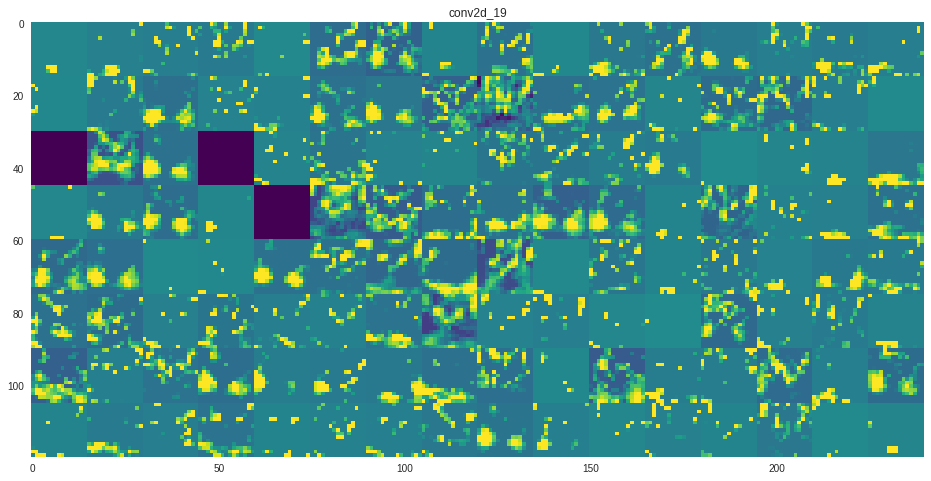

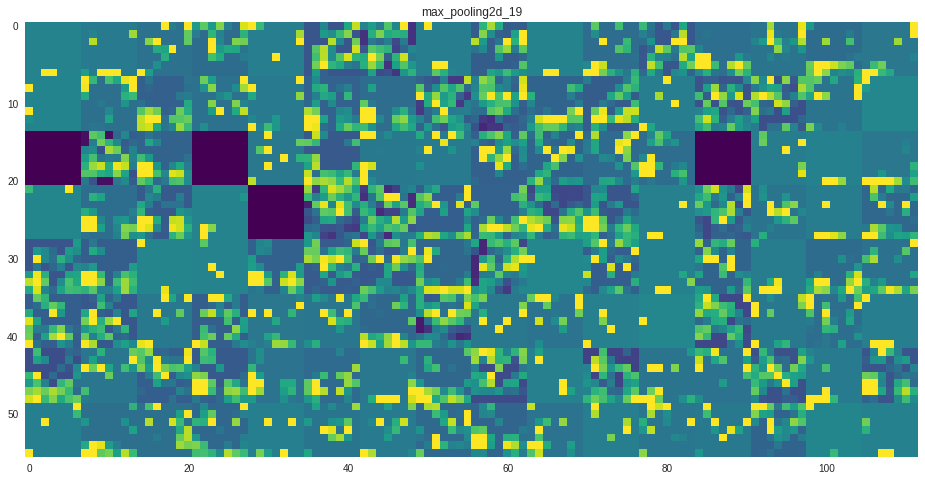

In [51]:
# 现在我们把所有的都拿来看看

#记录层的名称
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
  
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, : , :, col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
  scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

# 7 预训练模型的应用（还有时间的话给大家看看）
所谓的预训练模型是指在大规模数据集上训练好，保存好的网络。  
如果数据集足够大，并且足够有代表性的话，我们认为这个模型学到的是视觉世界的通用模型。可以应用于不同的计算机视觉问题，即使新问题的数据和原始训练数据不一致。  
常用的预训练图像模型是在ImageNet 数据集上训练得到的（140万图片，1000类） ，这些预训练的模型可以在keras.applications 中找到，本文我们使用一个架构较易理解的VGG19(Visual Geometry Group) 来给大家讲讲。   

** 预训练模型的两种使用方法：**


*   特征提取(feature extraction)
*   模型微调(fine-tuning)




## 特征提取
单是特征提取也存在两种形式，且听我娓娓道来。

In [7]:
# 特征提取
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16 = VGG16()
conv_base.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 15s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
__

In [0]:
from keras.utils import plot_model
plot_model(vgg16, to_file='vgg16.jpg', show_shapes=True)

### 不能使用数据增强的特征提取

In [0]:
# 首先我们将所有的  训练 测试  验证  中的图片通过 卷积模块提取特征
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

# 提取到的特征size是（4，4，512）
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [11]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 500)
test_features, test_labels = extract_features(test_dir, 500)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# 看看提取完特征后的train_features 的size
print('train_feature size is:', train_features.shape)

train_feature size is: (2000, 4, 4, 512)


In [0]:
## 由于后面要接全连接层，所以我们得将features展平
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (500, 4 * 4 * 512))
test_features = np.reshape(test_features, (500, 4 * 4 * 512))

In [14]:
# 来，让我们build 模型来try 一把，看看效果怎么样
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 500 samples
Epoch 1/30
2000/2000 [==============================] - 2s 867us/step - loss: 0.6259 - acc: 0.6425 - val_loss: 0.4478 - val_acc: 0.8260
Epoch 2/30
2000/2000 [==============================] - 1s 383us/step - loss: 0.4303 - acc: 0.8150 - val_loss: 0.3689 - val_acc: 0.8460
Epoch 3/30
2000/2000 [==============================] - 1s 390us/step - loss: 0.3612 - acc: 0.8555 - val_loss: 0.3275 - val_acc: 0.8580
Epoch 4/30
2000/2000 [==============================] - 1s 391us/step - loss: 0.3178 - acc: 0.8650 - val_loss: 0.3161 - val_acc: 0.8700
Epoch 5/30
2000/2000 [==============================] - 1s 384us/step - loss: 0.2913 - acc: 0.8795 - val_loss: 0.2976 - val_acc: 0.8700
Epoch 6/30
2000/2000 [==============================] - 1s 381us/step - loss: 0.2632 - acc: 0.9005 - val_loss:

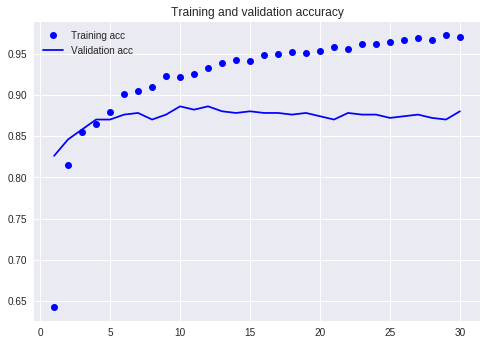

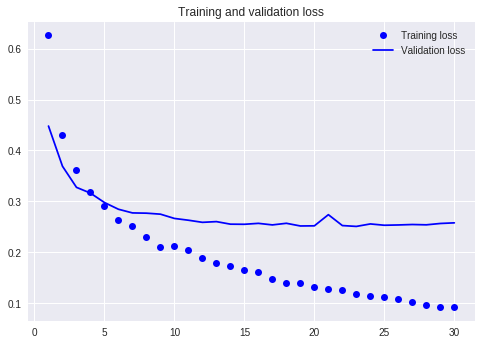

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 可以看出来模型很快过拟合了，上data augmentation

In [44]:
# 这种方法是将conv_base 作为我们模型的一部分，只是参数不参加训练，请看：
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 257       
Total params: 19,303,745
Trainable params: 4,589,057
Non-trainable params: 14,714,688
________________________________________________________

In [17]:
model.trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv3

In [26]:
# 把conv_base 锁起来，不让训练，然后再看
conv_base.trainable = False
model.trainable_weights

[<tf.Variable 'dense_9/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_9/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_10/kernel:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'dense_10/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_11/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32_ref>]

In [23]:
# data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

#! don't augment test set
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size=20,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [0]:
# 然后我们使用最初的data generator 来训练模型
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=25)


Epoch 1/50
100/100 [==============================] - 25s 249ms/step - loss: 0.5941 - acc: 0.6995 - val_loss: 0.4289 - val_acc: 0.8400
Epoch 2/50
100/100 [==============================] - 23s 227ms/step - loss: 0.4825 - acc: 0.7815 - val_loss: 0.3398 - val_acc: 0.8660
Epoch 3/50
100/100 [==============================] - 23s 228ms/step - loss: 0.4239 - acc: 0.8005 - val_loss: 0.3095 - val_acc: 0.8580
Epoch 4/50
100/100 [==============================] - 23s 227ms/step - loss: 0.3882 - acc: 0.8215 - val_loss: 0.2929 - val_acc: 0.8560
Epoch 5/50
100/100 [==============================] - 23s 228ms/step - loss: 0.3540 - acc: 0.8495 - val_loss: 0.2832 - val_acc: 0.8660
Epoch 6/50
100/100 [==============================] - 23s 227ms/step - loss: 0.3613 - acc: 0.8345 - val_loss: 0.2693 - val_acc: 0.8740
Epoch 7/50
100/100 [==============================] - 23s 227ms/step - loss: 0.3641 - acc: 0.8410 - val_loss: 0.2588 - val_acc: 0.8880
Epoch 8/50
100/100 [==============================] - 2

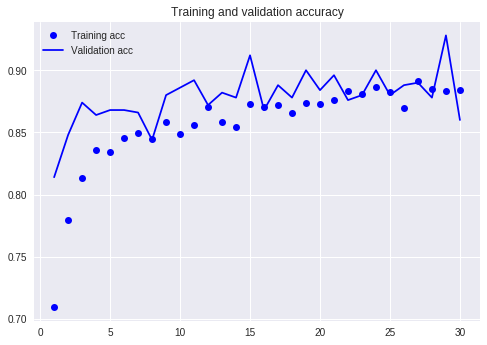

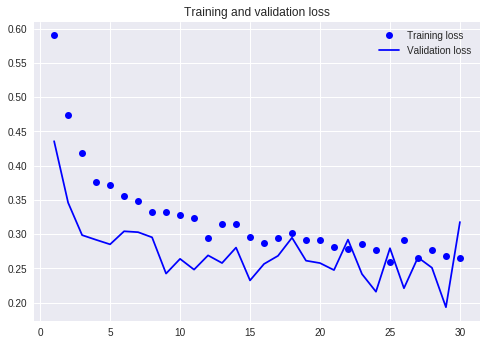

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=25)
print('test acc:', test_acc)